I'm okay with you using AI to help with code. I'm not okay with you using AI to write the written parts for you. When students have used AI to write for them in the past, I usually don't notice until late in the semester when it is too late to recover from the 0's that you will receive at the time of discovery.
You will need to setup your Google Colab notebook before completing this assignment. Please see the Introduction to Econometrics video for instructions. You can use my Google Colab as an example to complete the assignment.

Tasks
(1) Submit a professional assignment with proper grammar, punctuation, and clear organization.

(2) Come up with a market and plot a supply and demand curve for that market.

(3) Come up with reasons that the supply and demand curves might shift

(4) Create a plot with at least five supply curves and at least five demand curves

(5) Extract a subset of the equilibrium points and plot them with a regression line and display the slope

(6) Comment on the meaningfulness of this slope. Can we learn anything about the parameters of supply and demand curves from this data?

(7) Create the plot again, but this time do ten supply curves and one demand curve.

(8) Create the new scatter plot with the regression line again and comment on the slope. Can we learn anything about the parameters of the supply and demand curves from this data?

(9) Suppose you collected data on prices and quantities in your market. What other data might you collect to apply the above logic to estimate the parameters of supply and demand? Explain thoroughly.

(10) Write a paragraph about what you learned from this assignment. Use your own words.

NOTE*
This will need to become a google colab link that I can send to the professor.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<h3>(2) Come up with a market and plot a supply and demand curve for that market.</h3>

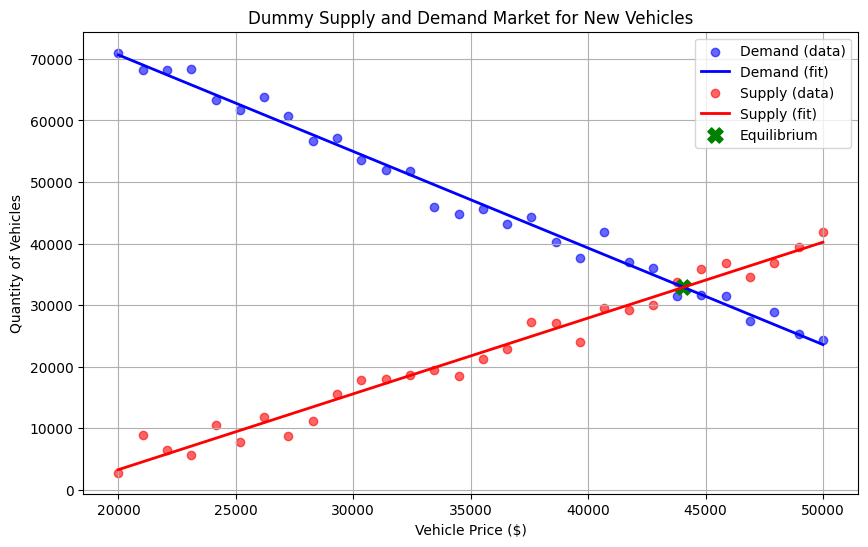

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1998.
Date:                Thu, 28 Aug 2025   Prob (F-statistic):           1.39e-27
Time:                        16:11:51   Log-Likelihood:                -265.04
No. Observations:                  30   AIC:                             534.1
Df Residuals:                      28   BIC:                             536.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.02e+05   1267.231     80.492      0.0

In [5]:
# (2) Come up with a market and plot a supply and demand curve for that market.
# demand captures consumer behavior
# supply captures producer behavior
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 30)  # price of new vehicles

# Demand curve: as price rises, demand falls
true_demand = 100000 - 1.5 * prices  # base linear relation
demand = true_demand + np.random.normal(0, 2000, size=prices.shape)  # add noise

# Supply curve: as price rises, supply increases
true_supply = -20000 + 1.2 * prices
supply = true_supply + np.random.normal(0, 2000, size=prices.shape)

# Fit linear regression models for demand and supply
X = prices.reshape(-1, 1)

lin_demand = LinearRegression().fit(X, demand)
lin_supply = LinearRegression().fit(X, supply)

# Predict fitted lines
demand_pred = lin_demand.predict(X)
supply_pred = lin_supply.predict(X)

# Use statsmodels for extra detail on demand
X_sm = sm.add_constant(prices)
model_demand_sm = sm.OLS(demand, X_sm).fit()

# ---- Find Equilibrium Point ----
# Demand: Qd = a_d + b_d * P
# Supply: Qs = a_s + b_s * P
a_d, b_d = lin_demand.intercept_, lin_demand.coef_[0]
a_s, b_s = lin_supply.intercept_, lin_supply.coef_[0]

# Solve for P* where Qd = Qs
# a_d + b_d*P = a_s + b_s*P
P_eq = (a_s - a_d) / (b_d - b_s)
Q_eq = a_d + b_d * P_eq

# Plot supply and demand
plt.figure(figsize=(10,6))
plt.scatter(prices, demand, color="blue", alpha=0.6, label="Demand (data)")
plt.plot(prices, demand_pred, color="blue", linewidth=2, label="Demand (fit)")

plt.scatter(prices, supply, color="red", alpha=0.6, label="Supply (data)")
plt.plot(prices, supply_pred, color="red", linewidth=2, label="Supply (fit)")

# Mark equilibrium point
plt.scatter(P_eq, Q_eq, color="green", s=120, marker="X", label="Equilibrium")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("Dummy Supply and Demand Market for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()

# Print regression summary for demand
print(model_demand_sm.summary())

# Print equilibrium point
print(f"Equilibrium Price: ${P_eq:,.2f}")
print(f"Equilibrium Quantity: {Q_eq:,.0f} vehicles")

<h3>(3) Come up with reasons that the supply and demand curves might shift</h2>
<p>TODO</p>

<h3>(4) Create a plot with at least five supply curves and at least five demand curves
</h3>

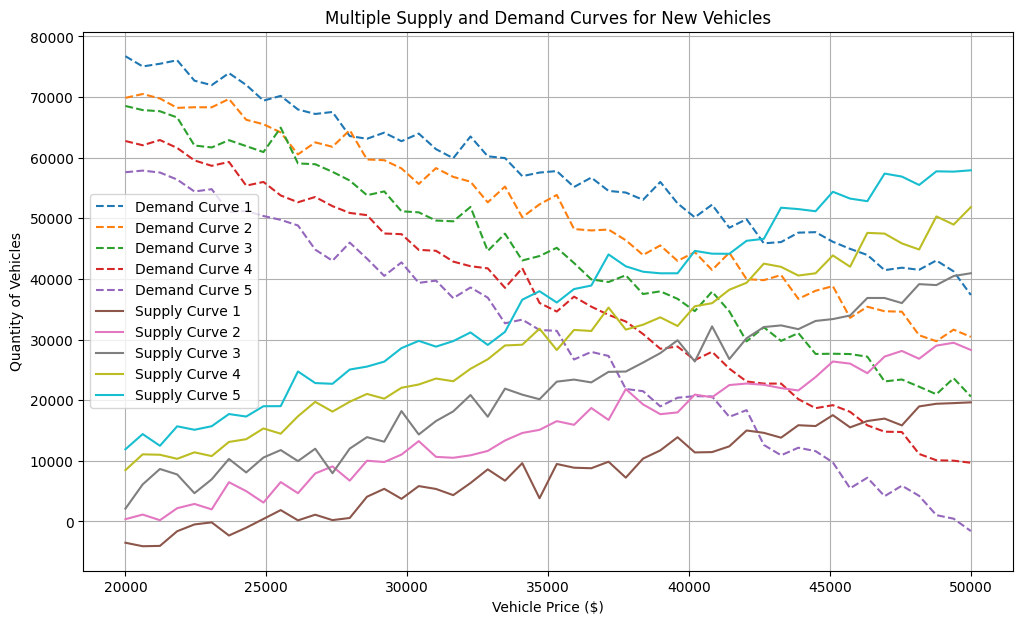

In [6]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create multiple demand and supply curves
supply_curves = []
demand_curves = []

for i in range(5):
    # Demand: downward slope with variation
    demand = 100000 - (1.2 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    demand_curves.append(demand)
    
    # Supply: upward slope with variation
    supply = -20000 + (0.8 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# Plot multiple supply and demand curves
plt.figure(figsize=(12, 7))

# Plot demand curves
for i, demand in enumerate(demand_curves, start=1):
    plt.plot(prices, demand, label=f"Demand Curve {i}", linestyle="--")

# Plot supply curves
for i, supply in enumerate(supply_curves, start=1):
    plt.plot(prices, supply, label=f"Supply Curve {i}")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("Multiple Supply and Demand Curves for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()


<h3>(5) Extract a subset of the equilibrium points and plot them with a regression line and display the slope
</h3>

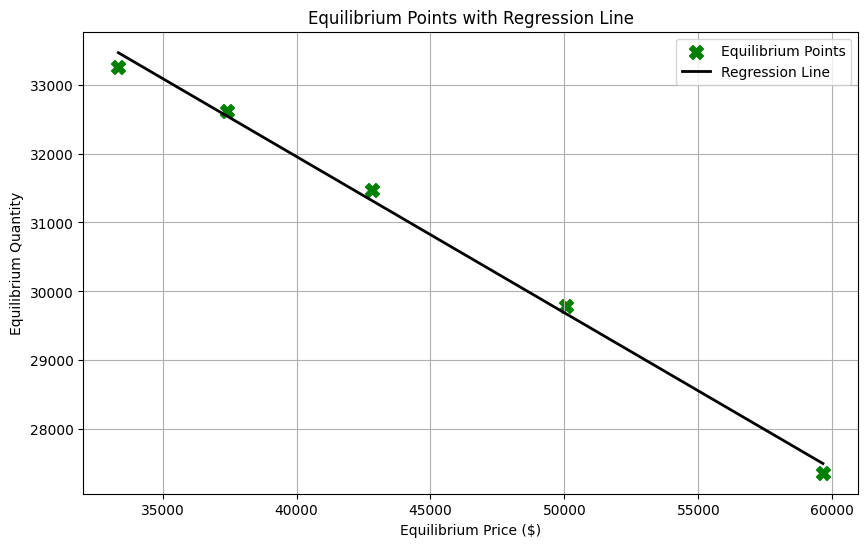

Slope of regression line: -0.2266


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create multiple demand and supply curves
supply_curves = []
demand_curves = []

for i in range(5):
    # Demand: downward slope with variation
    demand = 100000 - (1.2 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    demand_curves.append(demand)
    
    # Supply: upward slope with variation
    supply = -20000 + (0.8 + 0.2 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# ---- Find Equilibrium Points ----
equilibria = []
for i in range(5):
    # Fit demand and supply lines
    lin_demand = LinearRegression().fit(X, demand_curves[i])
    lin_supply = LinearRegression().fit(X, supply_curves[i])
    
    # Extract coefficients
    a_d, b_d = lin_demand.intercept_, lin_demand.coef_[0]
    a_s, b_s = lin_supply.intercept_, lin_supply.coef_[0]
    
    # Solve for equilibrium P and Q
    P_eq = (a_s - a_d) / (b_d - b_s)
    Q_eq = a_d + b_d * P_eq
    equilibria.append((P_eq, Q_eq))

# Convert to numpy array
equilibria = np.array(equilibria)

# Extract subset (all 5 here, but could choose fewer)
subset_eq = equilibria[:5]

# Fit regression line across equilibrium points
X_eq = subset_eq[:,0].reshape(-1,1)  # Prices
y_eq = subset_eq[:,1]                # Quantities
lin_eq = LinearRegression().fit(X_eq, y_eq)
y_pred = lin_eq.predict(X_eq)

# Plot equilibrium points and regression line
plt.figure(figsize=(10,6))
plt.scatter(subset_eq[:,0], subset_eq[:,1], color="green", s=100, marker="X", label="Equilibrium Points")
plt.plot(subset_eq[:,0], y_pred, color="black", linewidth=2, label="Regression Line")

plt.xlabel("Equilibrium Price ($)")
plt.ylabel("Equilibrium Quantity")
plt.title("Equilibrium Points with Regression Line")
plt.legend()
plt.grid(True)
plt.show()

# Display slope of regression line
print(f"Slope of regression line: {lin_eq.coef_[0]:.4f}")


<h3>(6) Comment on the meaningfulness of this slope. Can we learn anything about the parameters of supply and demand curves from this data?</h3>
<p>TODO</p>

<h3>(7) Create the plot again, but this time do ten supply curves and one demand curve.
</h3>

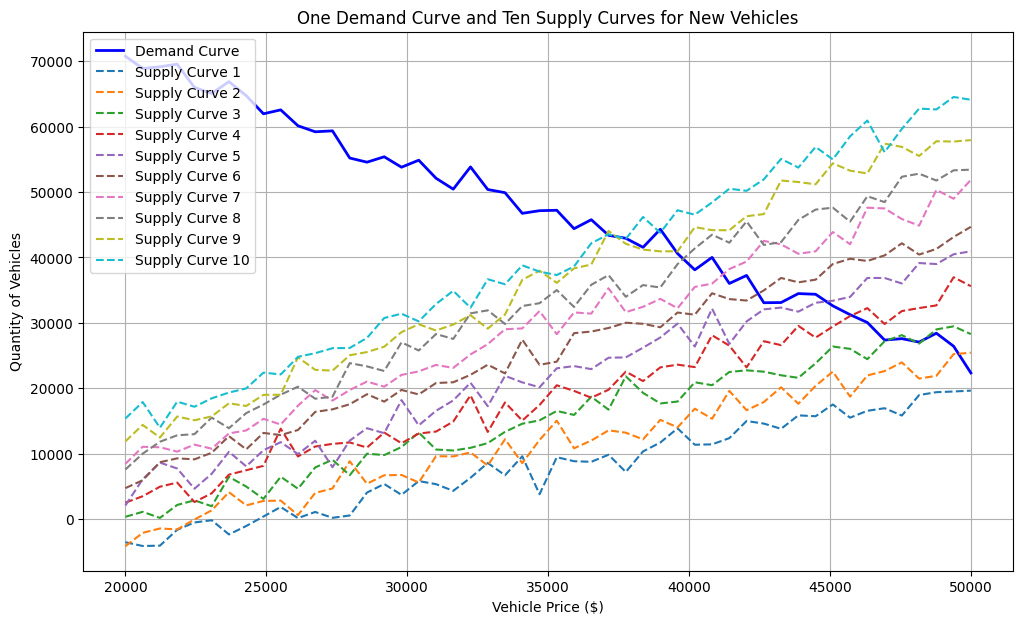

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy prices (x-axis)
prices = np.linspace(20000, 50000, 50)
X = prices.reshape(-1, 1)

# Create one demand curve
demand_curve = 100000 - 1.5 * prices + np.random.normal(0, 1500, size=prices.shape)

# Create multiple supply curves
supply_curves = []
for i in range(10):
    supply = -20000 + (0.8 + 0.1 * i) * prices + np.random.normal(0, 1500, size=prices.shape)
    supply_curves.append(supply)

# Plot demand curve
plt.figure(figsize=(12, 7))
plt.plot(prices, demand_curve, color="blue", linewidth=2, label="Demand Curve")

# Plot multiple supply curves
for i, supply in enumerate(supply_curves, start=1):
    plt.plot(prices, supply, label=f"Supply Curve {i}", linestyle="--")

plt.xlabel("Vehicle Price ($)")
plt.ylabel("Quantity of Vehicles")
plt.title("One Demand Curve and Ten Supply Curves for New Vehicles")
plt.legend()
plt.grid(True)
plt.show()


<h3>(8) Create the new scatter plot with the regression line again and comment on the slope. Can we learn anything about the parameters of the supply and demand curves from this data?
</h3>
<p>TODO</p>

<h3>(9) Suppose you collected data on prices and quantities in your market. What other data might you collect to apply the above logic to estimate the parameters of supply and demand? Explain thoroughly.
</h3>
<p>todo</p>

<h3>(10) Write a paragraph about what you learned from this assignment. Use your own words.</h3>
<p>todo!</p>